# Worksheet 05

Name:  Junyi Li
UID: U13632870

### Topics

- Cost Functions
- Kmeans

### Cost Function

Solving Data Science problems often starts by defining a metric with which to evaluate solutions were you able to find some. This metric is called a cost function. Data Science then backtracks and tries to find a process / algorithm to find solutions that can optimize for that cost function.

For example suppose you are asked to cluster three points A, B, C into two non-empty clusters. If someone gave you the solution `{A, B}, {C}`, how would you evaluate that this is a good solution?

Notice that because the clusters need to be non-empty and all points must be assigned to a cluster, it must be that two of the three points will be together in one cluster and the third will be alone in the other cluster.

In the above solution, if A and B are closer than A and C, and B and C, then this is a good solution. The smaller the distance between the two points in the same cluster (here A and B), the better the solution. So we can define our cost function to be that distance (between A and B here)!

The algorithm / process would involve clustering together the two closest points and put the third in its own cluster. This process optimizes for that cost function because no other pair of points could have a lower distance (although it could equal it).

### K means

a) (1-dimensional clustering) Walk through Lloyd's algorithm step by step on the following dataset:

`[0, .5, 1.5, 2, 6, 6.5, 7]` (note: each of these are 1-dimensional data points)

Given the initial centroids:

`[0, 2]`

cluster 1:[0,.5]
cluster 2:[1.5,2,6,6.5,7]

mean of cluster 1: 0.25

mean of cluster 2: 4.6


centroids[0.25, 4.6]


cluster 1: [0,.5,1.5,2]
cluster 2: [6,6.5,7]

mean of cluster 1: 1

mean of cluster 2: 6.5

centroids[1, 6.5]


cluster 1: [0,.5,1.5,2]
cluster 2: [6,6.5,7]




b) Describe in plain english what the cost function for k means is.

The cost function for k means is the sum of the squared distance between each point and its centroid.

c) For the same number of clusters K, why could there be very different solutions to the K means algorithm on a given dataset?

Because the initial centroids are randomly chosen, the result of the k means algorithm could be different.

d) Does Lloyd's Algorithm always converge? Why / why not?

Yes, because the cost function is monotonically decreasing.

e) Follow along in class the implementation of Kmeans

In [1]:
pip install sklearn


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


OSError: [Errno 30] Read-only file system: 'temp.png'

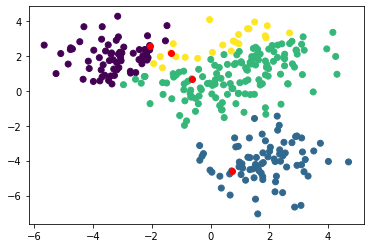

In [1]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0], [2, 2], [-3, 2], [2, -4]]
X, _ = datasets.make_blobs(n_samples=300, centers=centers, cluster_std=1, random_state=0)
# print(X)

class KMeans():

    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.assignment = [-1 for _ in range(len(data))]
        self.snaps = []
    
    def snap(self, centers):
        # print(5)
        TEMPFILE = "temp.png"

        fig, ax = plt.subplots()
        ax.scatter(X[:, 0], X[:, 1], c=self.assignment)
        ax.scatter(centers[:,0], centers[:, 1], c='r')
        fig.savefig(TEMPFILE)
        # print(TEMPFILE)
        plt.close()
        self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))

    def initialize(self):
        return self.data[np.random.choice(range(len(self.data)),self.k, replace = False)]
    
    def distance(self,x,y):
        return  np.linalg.norm(x-y)
    
                         
    def assign(self, centers):
        for i in range(len(self.data)):
            delta = [float('inf'),0]
            for j in range(len(centers)):
                distance = self.distance(centers[j],self.data[i])
                if distance<delta[0]:
                    delta[0] = distance 
                    delta[1] = j 
            
            self.assignment[i] = delta[1]


            
    def get_centers(self):
        centers = []

        for i in set(self.assignment):
            cluster = []

            for j in range(len(self.data)):
                
                if self.assignment[j] ==i:
                    cluster.append(data[j])
            x = 0
            y = 0
            for delta in range(len(cluster)):
                x+=cluster[delta][0]
                y+=cluster[delta][1]
            centers.append([x/len(cluster), y/len(cluster)])
        
        return np.array(centers)

            
    def is_diff_centers(self,centers, new_centers):
        n = len(centers)
        flag = 0
        for i in range(n):
            if centers[i][0]!=new_centers[i][0]:
                flag = 1
        
        if flag ==1:
            return True 
        return False



    def lloyds(self):
        # ...
        # print(15)
        centers = self.initialize()
        self.assign(centers)
        self.snap(centers)
        new_centers = self.get_centers()

        while self.is_diff_centers(centers,new_centers):
            # print(10)
            
            self.assign(new_centers)
            centers = new_centers
            self.snap(centers)
            new_centers = self.get_centers()

        
        return 

            

kmeans = KMeans(X, 4)
kmeans.lloyds()
images = kmeans.snaps
# print(kmeans.snaps)

images[0].save(
    'kmeans.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)
